## Importing The Necessary Libraries:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

##### - Handling missing values

In [14]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [15]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**

     - **5 -** EV Range:
        - How has the distribution of electric vehicle ranges changed over time?
        - What are the key differences in range between different models by manufacturers?
     

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [16]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

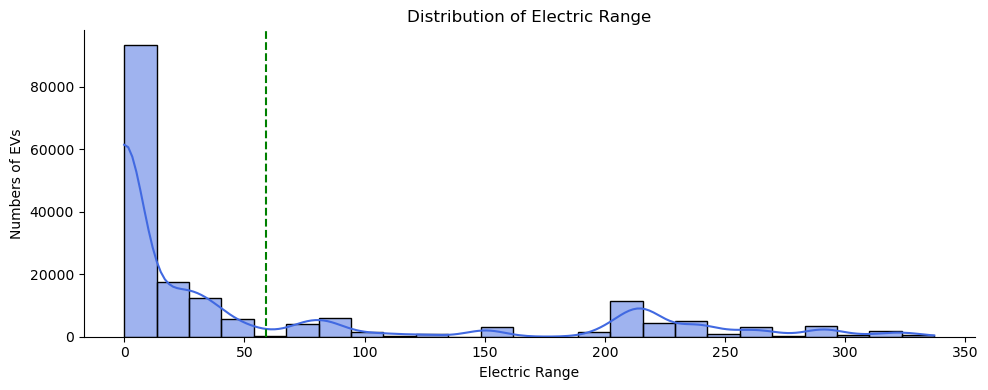

In [53]:
plt.figure(figsize=(10, 4))

# Plottin The Distribution of Electric Range
sns.histplot(df['Electric Range'], bins=25, kde=True, color='royalblue')

plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Numbers of EVs')

plt.axvline(df['Electric Range'].mean(), color='green', linestyle='--', label='Mean')

sns.despine()
plt.tight_layout()
plt.show()


In [18]:
top_5_make = df['Make'].value_counts().head(5).index

In [19]:
df_top5_makes = df[df['Make'].isin(top_5_make)]

#df_top5_makes

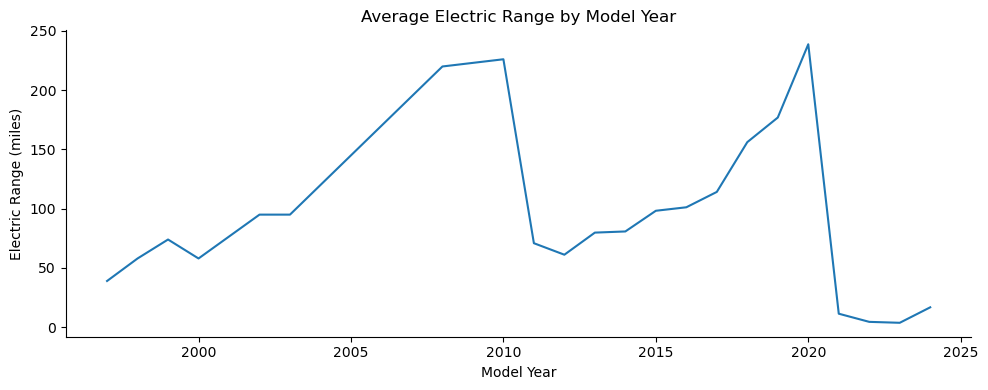

In [48]:
# Group data by Model Year and calculate the average Electric Range
range_by_year = df.groupby('Model Year', as_index=False)['Electric Range'].mean()

plt.figure(figsize=(10, 4))
# Plot using the averafe range by model year
sns.lineplot(data=range_by_year, x='Model Year', y='Electric Range', marker='')


plt.title('Average Electric Range by Model Year', fontsize=12)
plt.xlabel('Model Year', fontsize=10)
plt.ylabel('Electric Range (miles)', fontsize=10)

#plt.xticks(range(range_by_year['Model Year'].min(), range_by_year['Model Year'].max()+1))

sns.despine()
plt.tight_layout()
plt.show()


In [22]:

# Compare BEVs vs PHEVs
bevs = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phevs = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

print("Average range of BEVs:", bevs['Electric Range'].mean())
print("Average range of PHEVs:", phevs['Electric Range'].mean())


Average range of BEVs: 66.59453604611831
Average range of PHEVs: 30.810699268026788


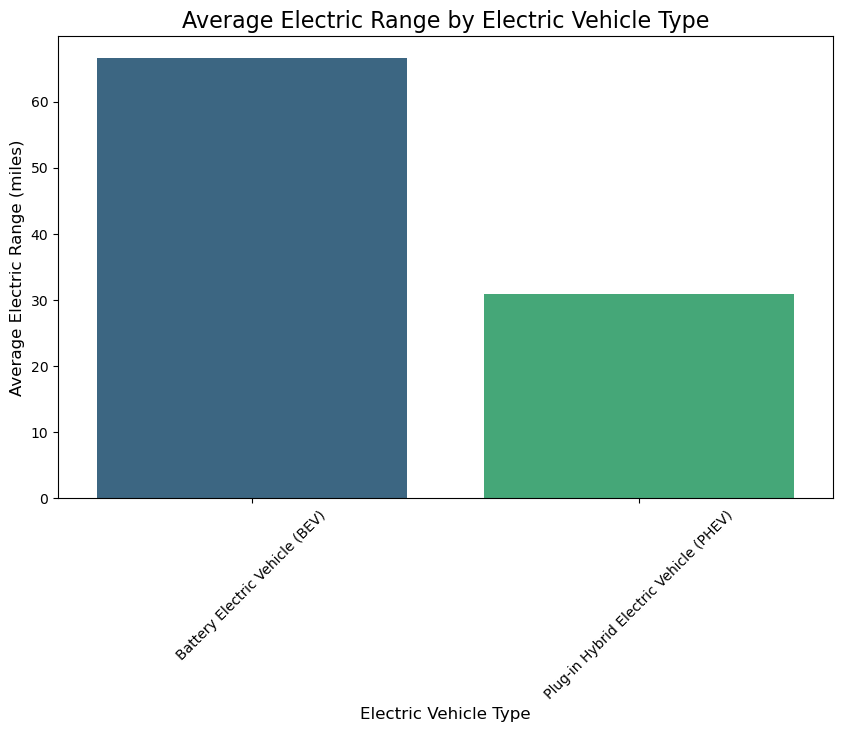

In [55]:


# Calculate the average Electric Range by Electric Vehicle Type
range_by_ev_type = df.groupby('Electric Vehicle Type', as_index=False)['Electric Range'].mean()

# Plot the comparison using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=range_by_ev_type, x='Electric Vehicle Type', y='Electric Range', palette='viridis')

# Add titles and labels
plt.title('Average Electric Range by Electric Vehicle Type', fontsize=16)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Average Electric Range (miles)', fontsize=12)
plt.xticks(rotation=45)

plt.show()
